# Proving hypothesis testing one sample

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 1600)
population = pd.Series(stats.norm.pdf(x))

In [4]:
population.describe()

count    1600.000000
mean        0.210516
std         0.127380
min         0.026652
25%         0.087016
50%         0.202651
75%         0.336655
max         0.398942
dtype: float64

In [5]:
print("population skew:", population.skew())
print("population mean:", population.mean())

population skew: 0.08038656863163338
population mean: 0.21051557382826455


In [6]:
# DO NOT DO THIS!
# sample data should not be from the population data.
# reference: https://stats.stackexchange.com/questions/592654/can-we-change-the-estimated-population-mean-in-hypothesis-testing?noredirect=1#comment1096571_592654
sample = population[:-400]

In [7]:
print("Hypothesis Testing\n"
      "H0: μ <= 0.21\n"
      "H1: μ > 0.21")

t_stat, p_value = stats.ttest_1samp(a = sample, popmean=0.24, alternative="greater")

print("sample mean:", sample.mean())
print("t-statistic: {0:.2f} p-value: {1:.2f}".format(t_stat, p_value))

# WRONG! WRONG!
# print("the popmean argument is our estimation of the population mean. "
#       "we can change the argumen as we like until we get enough evidence to reject "
#       "the null hypothesis.")
# the popmean is a priori. you should not change the popmean argument after the first test.
# reference: https://stats.stackexchange.com/questions/592654/can-we-change-the-estimated-population-mean-in-hypothesis-testing?noredirect=1#comment1096571_592654

print("if we want the confidence interval to be 95%, "
      "therefore the critical value is 2.5%")

print("because p-value is below 0.025, we have enough evidence to reject the null hypothesis. "
      "therefore, we can conclude that the mean population is more than 0.24.")

print("estimated population standard deviation {0:.2f}".format(sample.std(ddof=0)))

print("if we imagine the sample as the weight of waste per day, the conclusion is, "
      "95% of the time, the average weight of waste is less than 0.24. "
      "therefore, if we make a drop off site, the capacity per day should be "
      "estimated mean population + 3 * estimated mean standard deviation, "
      "which is: 0.24 + 3 * 0.12. "
      "with that capacity, the drop off site can handle 99.73% of the time without issue.")

Hypothesis Testing
H0: μ <= 0.21
H1: μ > 0.21
sample mean: 0.24853389422796615
t-statistic: 2.42 p-value: 0.01
if we want the confidence interval to be 95%, therefore the critical value is 2.5%
because p-value is below 0.025, we have enough evidence to reject the null hypothesis. therefore, we can conclude that the mean population is more than 0.24.
estimated population standard deviation 0.12
if we imagine the sample as the weight of waste per day, the conclusion is, 95% of the time, the average weight of waste is less than 0.24. therefore, if we make a drop off site, the capacity per day should be estimated mean population + 3 * estimated mean standard deviation, which is: 0.24 + 3 * 0.12. with that capacity, the drop off site can handle 99.73% of the time without issue.


# Analytics Vidhya

https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

## Detecting outliers using Boxplot

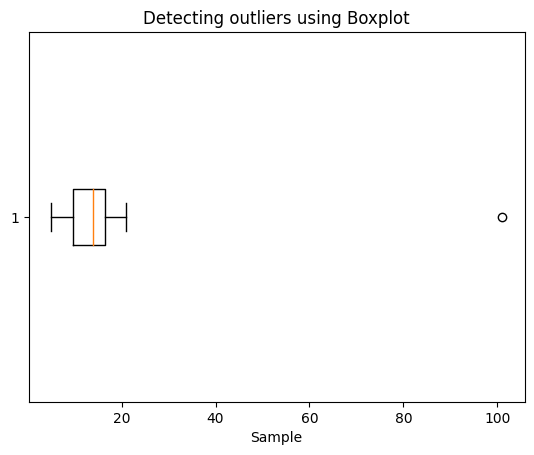

In [8]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
# vert=False to draw the box horizontally
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Sample")
plt.show()

## Detecting outliers using the Z-scores

In [9]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        print("data point: {0}, z_score: {1:.2f}".format(i, z_score))
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

data point: 15, z_score: -0.21
data point: 101, z_score: 3.26
data point: 18, z_score: -0.08
data point: 7, z_score: -0.53
data point: 13, z_score: -0.29
data point: 16, z_score: -0.16
data point: 11, z_score: -0.37
data point: 21, z_score: 0.04
data point: 5, z_score: -0.61
data point: 15, z_score: -0.21
data point: 10, z_score: -0.41
data point: 9, z_score: -0.45
Outliers from Z-scores method:  [101]


## Detecting outliers using the Interquartile Range (IQR)

In [10]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
def detect_outliers_iqr(data):
    outliers = []
    # numpy.percentile sort the array, so it is not necessary.
    # data = sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    print("Q1: {0}, Q3: {1}".format(q1, q3))
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("Lower limit: {0}, Upper limit: {1}".format(lwr_bound, upr_bound))
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Q1: 9.75, Q3: 16.5
Lower limit: -0.375, Upper limit: 26.625
Outliers from IQR method:  [101]


## Trimming/Remove the outliers

The article claimed that removing the outliers from the dataset is not a good practice.

In [11]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
sample_outliers = detect_outliers_iqr(sample)
# Trimming
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
print(a)

Q1: 9.75, Q3: 16.5
Lower limit: -0.375, Upper limit: 26.625
[15 18  7 13 16 11 21  5 15 10  9]


## Quantile based flooring and capping

This one is weird. Must ask Instructor

In [12]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

7.2 20.700000000000003
New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


## Mean/Median imputation

In [20]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
median = np.median(sample) # Replace with median
for i in sample_outliers:
    c = np.where(sample==i, median, sample)
print("Sample: ", sample)
print("New array: ", c)

Sample:  3.268283609245737
New array:  -0.030924904115496116
